In [5]:
using Plots

In [6]:
function projector(state)
    return state*state'
end

function random_state(dim=2)
    v=randn(1,dim)+randn(1,dim)im
    v=v/norm(v)
    return v'
end

function randHermitian(n)
    a = rand(n,n)+1im*rand(n,n)
    b = a+conj(transpose(a))
    return b
end

randHermitian (generic function with 1 method)

In [26]:
N = 10
tipo = zeros(N)
for l in 1:N
    H = randHermitian(l);
    H = H/norm(H)
    psi = random_state(l)
    @show trace(H)
    @show trace(projector(psi)*H)
    tipo[l] = real(l*trace(projector(psi)*H)/trace(H))
end

trace(H) = 1.0 + 0.0im
trace(projector(psi) * H) = 1.0 + 0.0im
trace(H) = 0.5018894884413944 + 0.0im
trace(projector(psi) * H) = -0.17742372252009198 + 0.0im
trace(H) = 1.1083339726218577 + 0.0im
trace(projector(psi) * H) = 0.06846603116664843 + 0.0im
trace(H) = 0.8077580525645172 + 0.0im
trace(projector(psi) * H) = 0.2138840376718171 - 1.3877787807814457e-17im
trace(H) = 0.7835512799142978 + 0.0im
trace(projector(psi) * H) = 0.365015405896367 - 3.469446951953614e-18im
trace(H) = 1.1535647175813442 + 0.0im
trace(projector(psi) * H) = 0.08834886153420035 + 2.6020852139652106e-18im
trace(H) = 0.952785488539546 + 0.0im
trace(projector(psi) * H) = -0.02122298269575514 - 1.3877787807814457e-17im
trace(H) = 1.4033123308073063 + 0.0im
trace(projector(psi) * H) = 0.15587531462719556 - 6.938893903907228e-18im
trace(H) = 0.7332999361066623 + 0.0im
trace(projector(psi) * H) = 0.038045376146762386 - 1.0408340855860843e-17im
trace(H) = 0.8889826798780784 + 0.0im
trace(projector(psi) * H) = 0.106676


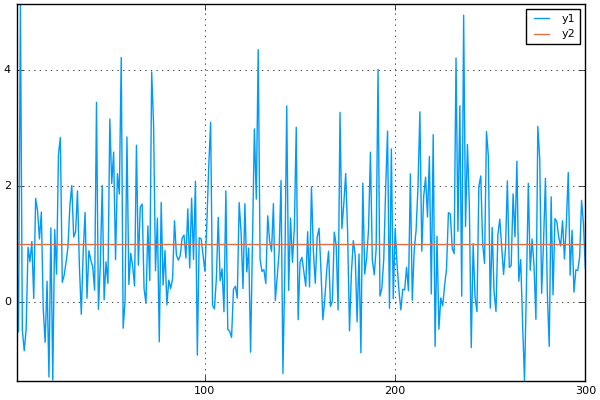

In [24]:
plot(tipo)
plot!(ones(N))